In [ ]:
#data loading
import pandas as pd
filename="/content/SmokeBan.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames smoker  ban  age     education afam hispanic  gender
0            1    yes  yes   41            hs   no       no  female
1            2    yes  yes   44  some college   no       no  female
2            3     no   no   19  some college   no       no  female
3            4    yes   no   29            hs   no       no  female
4            5     no  yes   28  some college   no       no  female
...        ...    ...  ...  ...           ...  ...      ...     ...
9995      9996     no   no   55            hs   no       no    male
9996      9997     no   no   31        master   no       no    male
9997      9998     no  yes   36  some college   no       no  female
9998      9999    yes   no   42            hs   no       no  female
9999     10000     no  yes   35  some college   no       no    male

[10000 rows x 8 columns]


In [ ]:
##Checking for null values
a.isna().sum()

,0
rownames,0
smoker,0
ban,0
age,0
education,0
afam,0
hispanic,0
gender,0


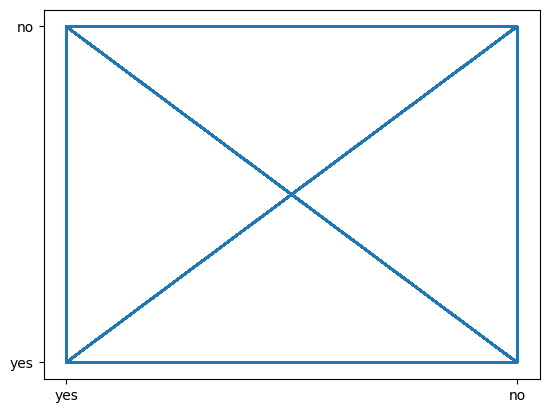

In [ ]:
from matplotlib import pyplot as plt
target="ban"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 10000 artists>

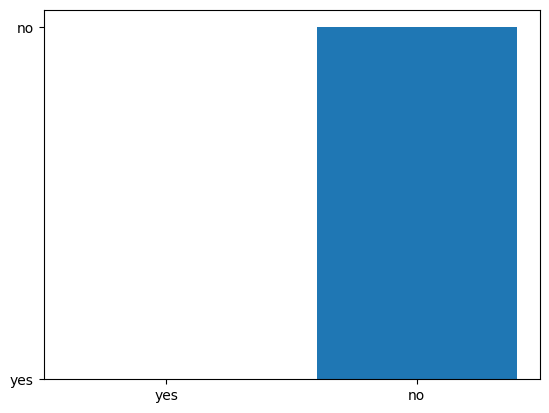

In [ ]:
plt.bar(a[a.columns[2]],a[str(target)])

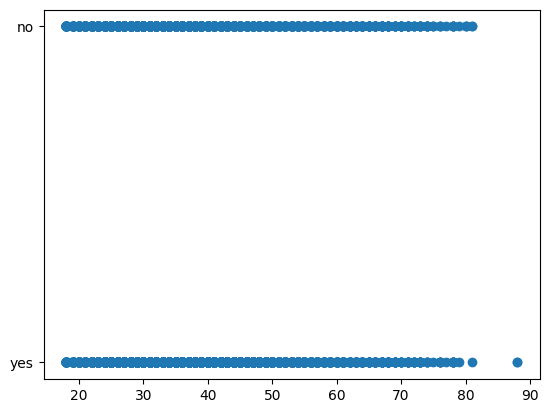

In [ ]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={1,2,4,5,6,7}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  smoker  ban  age  education  afam  hispanic  gender
0            1       1    1   41          1     0         0       0
1            2       1    1   44          4     0         0       0
2            3       0    0   19          4     0         0       0
3            4       1    0   29          1     0         0       0
4            5       0    1   28          4     0         0       0
...        ...     ...  ...  ...        ...   ...       ...     ...
9995      9996       0    0   55          1     0         0       1
9996      9997       0    0   31          3     0         0       1
9997      9998       0    1   36          4     0         0       0
9998      9999       1    0   42          1     0         0       0
9999     10000       0    1   35          4     0         0       1

[10000 rows x 8 columns]


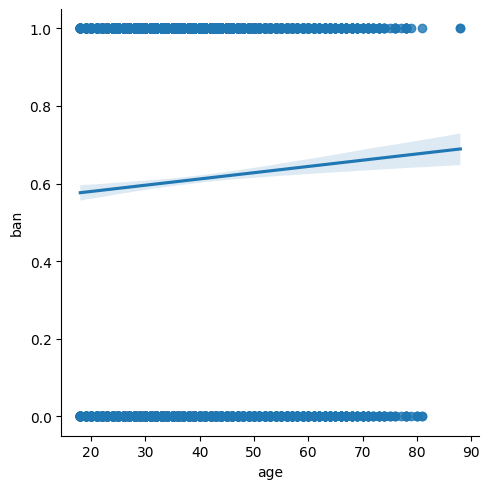

In [ ]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="age",y=str(target),data=a)

<Axes: xlabel='afam', ylabel='ban'>

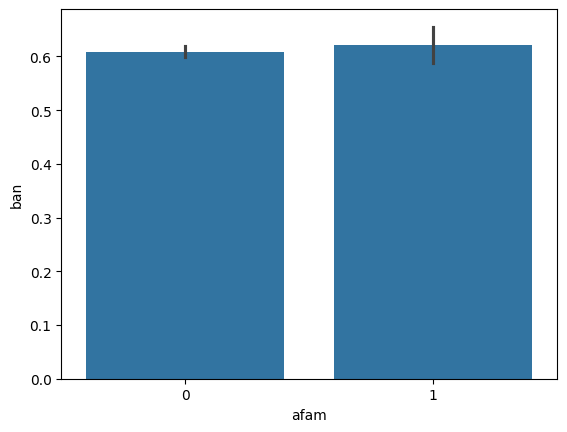

In [ ]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='smoker', ylabel='ban'>

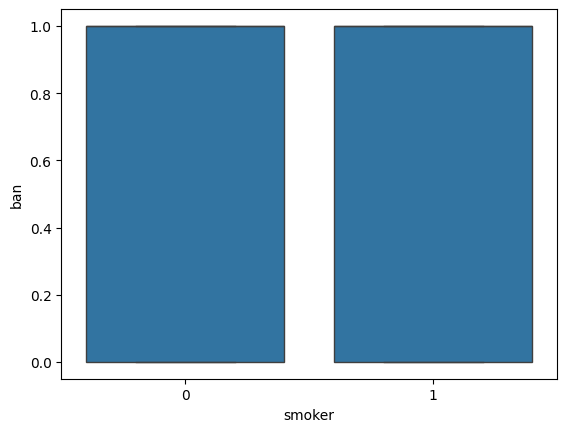

In [ ]:
sns.boxplot(x=a.columns[1],y=str(target),data=a)

<ipython-input-12-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='ban', ylabel='Density'>

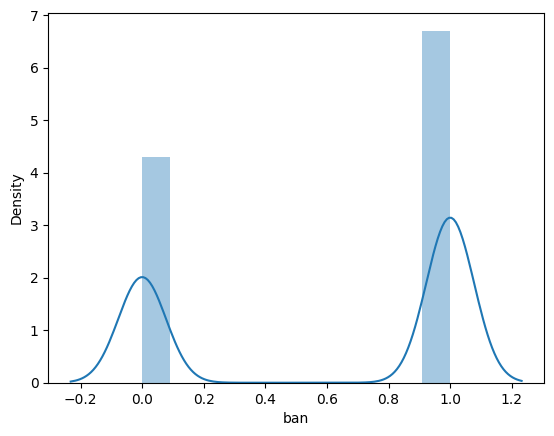

In [ ]:
sns.distplot(a[str(target)])

<Axes: xlabel='smoker', ylabel='Density'>

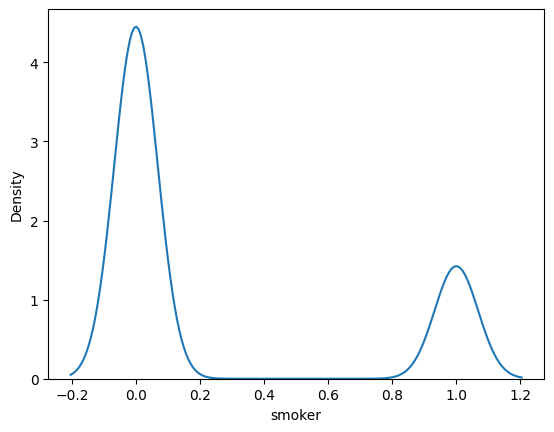

In [ ]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='education', ylabel='count'>

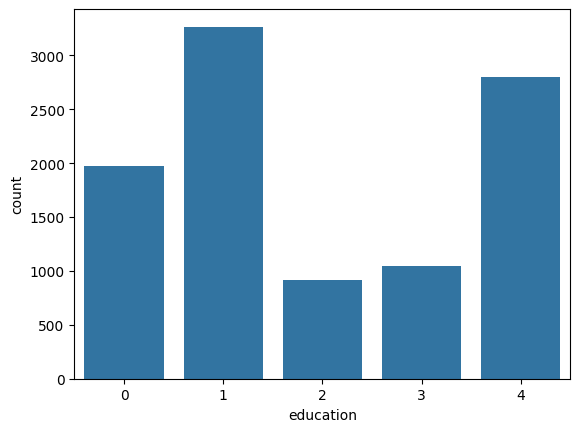

In [ ]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

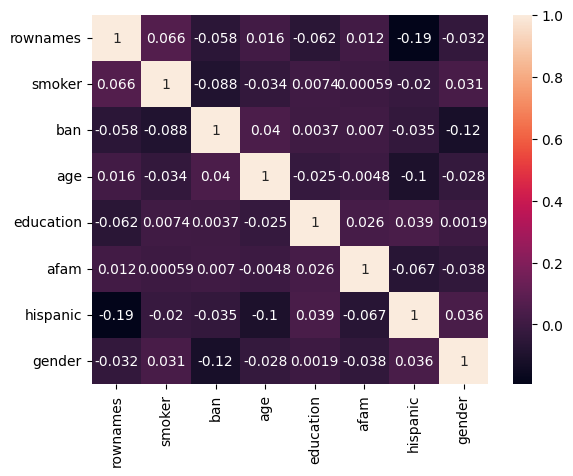

In [ ]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

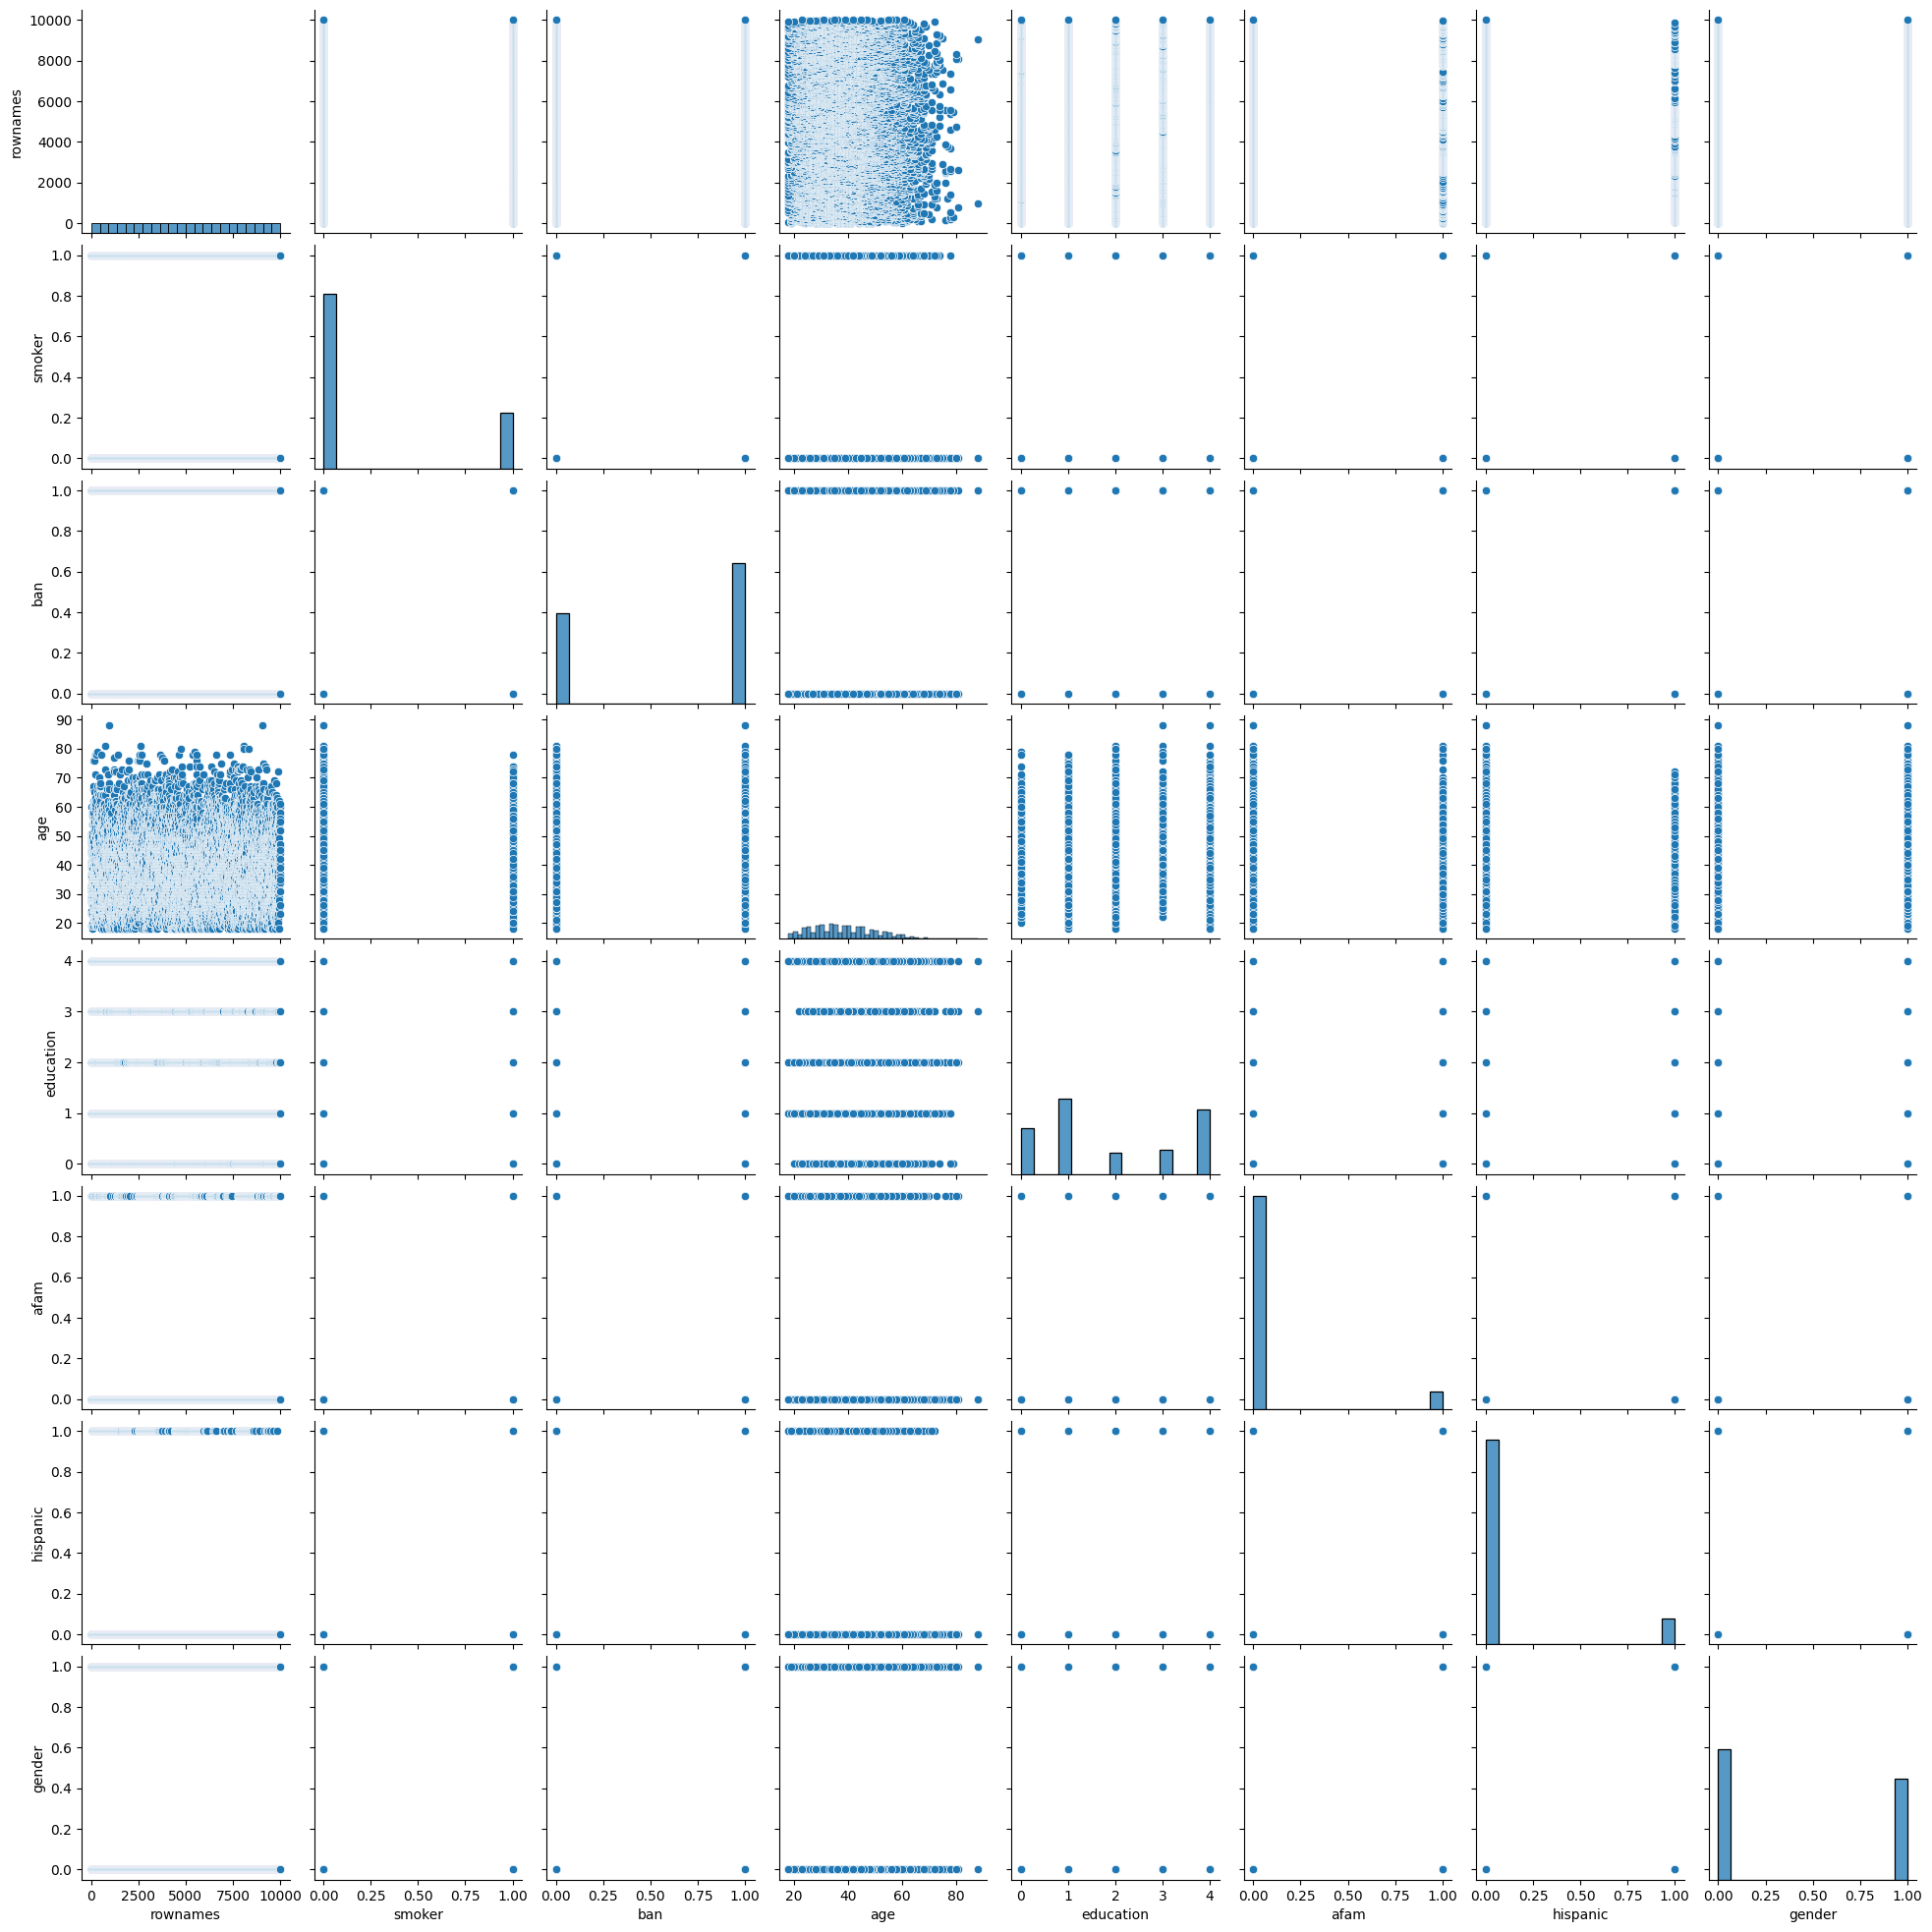

In [ ]:
sns.pairplot(data=a)

In [ ]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  smoker  age  education  afam  hispanic  gender
0            1       1   41          1     0         0       0
1            2       1   44          4     0         0       0
2            3       0   19          4     0         0       0
3            4       1   29          1     0         0       0
4            5       0   28          4     0         0       0
...        ...     ...  ...        ...   ...       ...     ...
9995      9996       0   55          1     0         0       1
9996      9997       0   31          3     0         0       1
9997      9998       0   36          4     0         0       0
9998      9999       1   42          1     0         0       0
9999     10000       0   35          4     0         0       1

[10000 rows x 7 columns]


In [ ]:
print(y)

0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: ban, Length: 10000, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train)

      rownames  smoker  age  education  afam  hispanic  gender
8416      8417       0   37          3     0         0       1
4387      4388       0   37          1     0         0       0
5471      5472       0   38          2     0         1       1
69          70       0   37          4     0         0       0
166        167       0   20          2     0         1       1
...        ...     ...  ...        ...   ...       ...     ...
1087      1088       0   46          0     0         0       1
2505      2506       0   57          4     0         0       0
7883      7884       0   44          2     0         1       1
6316      6317       1   62          0     0         0       1
5467      5468       0   21          2     0         1       0

[8000 rows x 7 columns]


In [ ]:
print(y_train)

8416    1
4387    1
5471    0
69      1
166     1
       ..
1087    1
2505    0
7883    0
6316    0
5467    1
Name: ban, Length: 8000, dtype: int64


In [ ]:
print(x_test)

      rownames  smoker  age  education  afam  hispanic  gender
899        900       0   41          0     0         0       0
938        939       1   56          0     0         0       1
6984      6985       0   32          1     0         0       0
5537      5538       0   44          2     0         1       1
8693      8694       0   59          3     0         0       0
...        ...     ...  ...        ...   ...       ...     ...
5872      5873       0   40          0     0         1       0
8636      8637       1   56          1     1         0       0
9948      9949       0   34          1     0         0       0
3009      3010       0   43          3     0         0       1
3925      3926       0   28          4     0         0       1

[2000 rows x 7 columns]


In [ ]:
print(y_test)

899     0
938     1
6984    1
5537    0
8693    1
       ..
5872    1
8636    0
9948    1
3009    1
3925    1
Name: ban, Length: 2000, dtype: int64


In [30]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print(ypred)

[1 1 1 ... 1 1 1]


In [42]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.5685


In [46]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[318 484]
 [379 819]]


In [32]:
print(model.predict([[900,0,41,0,0,0,0]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [34]:
print(ypred)

[0 1 0 ... 0 1 1]


In [43]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.5685


In [47]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[318 484]
 [379 819]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.46      0.40      0.42       802
           1       0.63      0.68      0.65      1198

    accuracy                           0.57      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.56      0.57      0.56      2000



In [35]:
print(model.predict([[900,0,41,0,0,0,0]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [39]:
print(ypred)

[0 1 1 ... 1 1 1]


In [44]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.5685


In [48]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[318 484]
 [379 819]]


In [40]:
print(model.predict([[900,0,41,0,0,0,0]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.46      0.40      0.42       802
           1       0.63      0.68      0.65      1198

    accuracy                           0.57      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.56      0.57      0.56      2000

